# Buy Prediction Algorithm NZD-USD
This notebook aims to minimize the clasification loss between No Action and Buy Action

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Constants

In [2]:
ticker = "NZDUSD=X"

## Pre Algorithm

### Read Dataset

In [3]:
predictors = pd.read_csv('./' + ticker + '_input_signals.csv')
predictors_list = list(predictors.columns)
predictors

,Open,High,Low,Close,Adj Close,Volume,diff-day-1,diff-day-2,diff-day-3,diff-day-4,...,EMA-7,EMA-21,EMA-50,RSI,MACD,ADX,STD,bb_width,bb_buy,bb_sell
0,0.621504,0.623791,0.618506,0.619809,0.619809,0,-0.001695,-0.006208,-0.002933,-0.005777,...,-0.002277,0.000298,-0.000909,0.515714,0.001007,0.154273,0.002375,0.009498,-0.008072,-0.001426
1,0.619617,0.620001,0.614817,0.618582,0.618582,0,-0.001227,-0.002922,-0.007435,-0.004160,...,-0.002628,-0.000845,-0.002052,0.500428,0.000573,0.146584,0.002571,0.010285,-0.008291,-0.001994
2,0.618697,0.620232,0.616105,0.619310,0.619310,0,0.000728,-0.000499,-0.002194,-0.006707,...,-0.001425,-0.000106,-0.001272,0.509713,0.000313,0.138918,0.002666,0.010664,-0.007066,-0.003597
3,0.619195,0.621002,0.615915,0.620617,0.620617,0,0.001307,0.002035,0.000808,-0.000887,...,-0.000089,0.001091,0.000033,0.526721,0.000212,0.129965,0.001016,0.004063,-0.001379,-0.002684
4,0.620617,0.622781,0.616599,0.622394,0.622394,0,0.001777,0.003084,0.003812,0.002585,...,0.001266,0.002608,0.001739,0.549598,0.000245,0.123905,0.001306,0.005225,-0.000361,-0.004864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,0.704002,0.705430,0.702500,0.704052,0.704052,0,-0.000088,-0.003287,-0.003098,-0.002947,...,0.000200,0.008570,0.020727,0.676821,-0.000012,0.443293,0.001506,0.006025,-0.004897,-0.001129
3718,0.704072,0.709512,0.703700,0.704072,0.704072,0,0.000020,-0.000068,-0.003267,-0.003078,...,0.000165,0.007809,0.019934,0.677012,-0.000312,0.448389,0.001548,0.006191,-0.004374,-0.001817
3719,0.701740,0.708421,0.701538,0.701641,0.701641,0,-0.002430,-0.002411,-0.002499,-0.005697,...,-0.001699,0.004889,0.016817,0.627907,-0.000714,0.445866,0.001813,0.007251,-0.006233,-0.001018
3720,0.709280,0.711101,0.707559,0.709401,0.709401,0,0.007760,0.005329,0.005349,0.005261,...,0.004545,0.011499,0.023613,0.702180,-0.000507,0.446968,0.002553,0.010210,-0.000365,-0.009845


In [4]:
target = pd.read_csv('./' + ticker + '_output_signals.csv')
#target

### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
train_predictors, test_predictors, train_targets, test_targets = train_test_split(
        predictors,
        target,
        test_size=0.20,
        random_state=42,
        shuffle=False
)

In [6]:
train_predictors

,Open,High,Low,Close,Adj Close,Volume,diff-day-1,diff-day-2,diff-day-3,diff-day-4,...,EMA-7,EMA-21,EMA-50,RSI,MACD,ADX,STD,bb_width,bb_buy,bb_sell
0,0.621504,0.623791,0.618506,0.619809,0.619809,0,-0.001695,-0.006208,-0.002933,-0.005777,...,-0.002277,0.000298,-0.000909,0.515714,0.001007,0.154273,0.002375,0.009498,-0.008072,-0.001426
1,0.619617,0.620001,0.614817,0.618582,0.618582,0,-0.001227,-0.002922,-0.007435,-0.004160,...,-0.002628,-0.000845,-0.002052,0.500428,0.000573,0.146584,0.002571,0.010285,-0.008291,-0.001994
2,0.618697,0.620232,0.616105,0.619310,0.619310,0,0.000728,-0.000499,-0.002194,-0.006707,...,-0.001425,-0.000106,-0.001272,0.509713,0.000313,0.138918,0.002666,0.010664,-0.007066,-0.003597
3,0.619195,0.621002,0.615915,0.620617,0.620617,0,0.001307,0.002035,0.000808,-0.000887,...,-0.000089,0.001091,0.000033,0.526721,0.000212,0.129965,0.001016,0.004063,-0.001379,-0.002684
4,0.620617,0.622781,0.616599,0.622394,0.622394,0,0.001777,0.003084,0.003812,0.002585,...,0.001266,0.002608,0.001739,0.549598,0.000245,0.123905,0.001306,0.005225,-0.000361,-0.004864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,0.711389,0.721397,0.706115,0.711389,0.711389,0,0.002049,0.004421,0.008140,0.008589,...,0.005383,0.011778,0.012642,0.702257,0.001591,0.269600,0.003351,0.013403,-0.002062,-0.011341
2973,0.708918,0.713089,0.708898,0.708818,0.708818,0,-0.002572,-0.000523,0.001849,0.005568,...,0.002108,0.008369,0.009676,0.649917,0.001377,0.291316,0.002741,0.010965,-0.004618,-0.006347
2974,0.710071,0.711389,0.707469,0.710021,0.710021,0,0.001203,-0.001369,0.000680,0.003052,...,0.002483,0.008702,0.010452,0.662584,0.001218,0.306916,0.001453,0.005811,-0.002193,-0.003619
2975,0.708848,0.715129,0.707569,0.709019,0.709019,0,-0.001002,0.000201,-0.002371,-0.000322,...,0.001111,0.007000,0.009080,0.641756,0.000959,0.324997,0.000930,0.003721,-0.002559,-0.001162


### More Preprocessing

In [7]:
train_targets = np.ravel(train_targets)
test_targets = np.ravel(test_targets)

### Utility

## Algorithm 1 - Random Forests

In [8]:
# Imports
from sklearn.ensemble import RandomForestRegressor

In [9]:
# Constants
number_of_trees = 100

In [10]:
# Training
rf = RandomForestRegressor(n_estimators=number_of_trees, random_state=42)
rf.fit(train_predictors, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [11]:
# Test Set Prediction
predictions = rf.predict(test_predictors)

In [12]:
# Calculate the absolute errors
errors = abs(predictions - test_targets)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'Points.')

Mean Absolute Error: 0.15 Points.


In [13]:
manual_comparison = pd.DataFrame({
    'Predictions': predictions,
    'Actual': test_targets,
})

#list(manual_comparison.to_numpy())

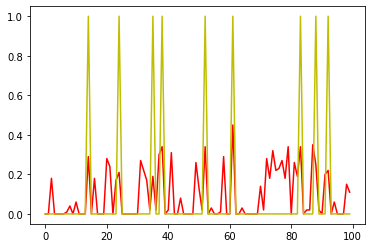

In [14]:
pruning_constant = 100
pruned_predictions = predictions[:pruning_constant]
pruned_test_targets = test_targets[:pruning_constant]
plt.plot(pruned_predictions, c="r")
plt.plot(pruned_test_targets, c="y")
plt.show()

### Performance Visualization

In [15]:
test_target_indices = list(np.where(test_targets == 1)[0])

In [32]:
# Threshold Constants
thresholded_prediction_indices = list(np.where(predictions > 0.40)[0])

In [33]:
adj_close = test_predictors["Adj Close"].to_numpy()

In [34]:
# Constants
pruning_constant = 300

# Pruning for vizualization
test_target_indices = np.array(test_target_indices)
thresholded_prediction_indices = np.array(thresholded_prediction_indices)

test_target_indices = test_target_indices[test_target_indices < pruning_constant]
thresholded_prediction_indices = thresholded_prediction_indices[thresholded_prediction_indices < pruning_constant]
adj_close = adj_close[:pruning_constant]

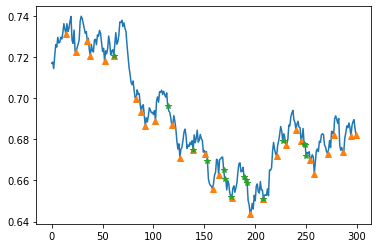

In [35]:
# Visualization
plt.plot(adj_close)
plt.plot(test_target_indices, adj_close[test_target_indices], "^")
plt.plot(thresholded_prediction_indices, adj_close[thresholded_prediction_indices], "*")

#### Importnace Visualization

In [20]:
importance_data = ""

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for
                       feature, importance in
                       zip(predictors_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1],
                             reverse=True)
# Print out the feature and importances
importance_data = ['Variable: {:20} Importance: {}'.format(*pair) for pair in feature_importances]
feature_importances
# for pair in feature_importances:
#     print(pair[0] + " : " + str(pair[1]))
#print(feature_importances)

[('EMA-2', 0.14),
 ('diff-day-1', 0.07),
 ('diff-day-2', 0.07),
 ('EMA-3', 0.07),
 ('ADX', 0.07),
 ('bb_sell', 0.07),
 ('diff-day-3', 0.05),
 ('diff-day-5', 0.05),
 ('MACD', 0.05),
 ('diff-day-4', 0.04),
 ('RSI', 0.04),
 ('Open', 0.03),
 ('EMA-5', 0.03),
 ('EMA-7', 0.03),
 ('EMA-21', 0.03),
 ('EMA-50', 0.03),
 ('High', 0.02),
 ('Low', 0.02),
 ('Close', 0.02),
 ('Adj Close', 0.02),
 ('STD', 0.02),
 ('bb_width', 0.02),
 ('bb_buy', 0.02),
 ('Volume', 0.0)]

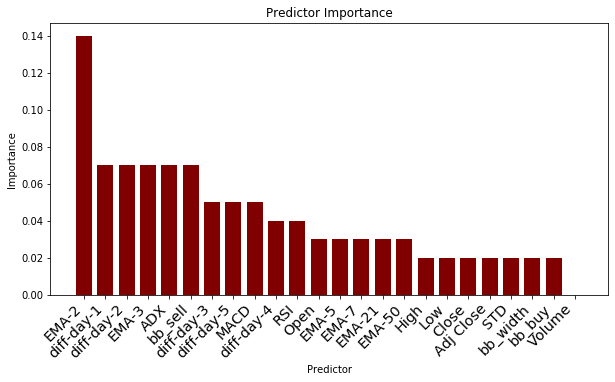

In [21]:
# creating the dataset
labels = []
values = []
for pair in feature_importances:
    labels.append(pair[0])
    values.append(pair[1])

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(labels, values, color ='maroon', width = 0.75)

plt.xlabel("Predictor")
plt.ylabel("Importance")
plt.title("Predictor Importance")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()

## Algorithm 2 - Random Forests + XGBoost

## Algorithm 3 - Neural Networks

## Algorithm 4 - RNNs